In [1]:
import math
import numpy as np

from sklearn import datasets

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
RS = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

def plot_clusters(clusters):
    n_k = len(clusters)
    
    assert n_k <= len(RS)
    
    i = 0
    for key in range(n_k):
        cluster = clusters[key]
        plt.scatter(cluster[0], cluster[1], color=RS[i], label=i, marker='h', s=250, edgecolor='k')
        i += 1
    
def plot_search_space_by_cluster(X, title = None, instances_to_clusters = {}, clusters = []):
    
    n_k = len(clusters)
    assert n_k <= len(RS)
    
    i = 0
    for key in range(n_k):
        data = instances_to_clusters[key]
        if not len(data) == 0:
            d = np.array(instances_to_clusters[key])
            plt.scatter(d[:,0], d[:,1], color=RS[i])
            
        i += 1
    
    if not title == None:
        plt.title(title)

    if len(clusters) > 0:
        plot_clusters(clusters)
    
    plt.show()

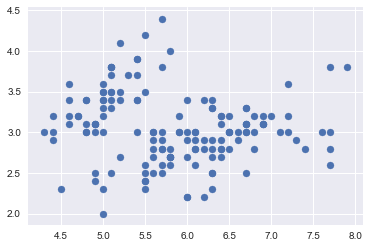

In [3]:
X, y = datasets.load_iris(return_X_y=True)

## slim it down to 2d,
X = X[:, 0:2]

plt.scatter(X[:,0], X[:,1])
plt.show()

In [4]:
def assign_instances_to_cluster(X, clusters):
    def euclidean_distance(p, q):    
        if type(p) == int:
            p = [ p ]
        if type(q) == int:
            q = [ q ]

        ## shortest distance to go, between two points,
        assert len(p) == len(q)
        return math.sqrt( \
            np.sum([ (x1 - x2) ** 2 for x1, x2 in zip(p, q) ]) \
        )

    def assign_instance_a_cluster(instance, clusters):
        n_k = len(clusters)
        return np.argmin([ 
            euclidean_distance(instance, clusters[i]) for i in range(n_k) 
        ])
    
    cluster_to_instances = dict(
        [ (i, []) for i in range(len(clusters)) ])
    for row in X:
        cluster_assignment = assign_instance_a_cluster(row, clusters)
        cluster_to_instances[cluster_assignment].append(row.tolist())
    return cluster_to_instances


def update_cluster_centroid(cluster, use_kmeans=True):
    _, c_l = X.shape;
    
    if use_kmeans:
        return [
            np.mean(
                np.array(cluster)[:, i])
            for i in range(c_l)
        ]
    
    return [
        np.median(
            np.array(cluster)[:, i]) 
        for i in range(c_l)
    ]

In [5]:
def draw_partial_point(X, i):
    OFFSET = .5
    X_min_and_maxs = (np.min(X[:, i]) - OFFSET, np.max(X[:, i]) + OFFSET)
    return np.random.uniform(X_min_and_maxs[0], X_min_and_maxs[1], 1)[0]

In [6]:
def run_example(use_means = True):
    np.random.seed(11)

    ## pull initial clusters,
    n_k = 3; _, c_l = X.shape;
    clusters = [
        [
            ## pull a random dim value,
            draw_partial_point(X, i) for i in range(c_l)
        ]
        for _ in range(n_k)
    ]

    ## assign points to clusters, plot,
    iteration = 0
    cluster_to_instances = assign_instances_to_cluster(X, clusters)
    plot_search_space_by_cluster(X, iteration, cluster_to_instances, clusters)

    old_clusters = [ 
        (iteration, clusters.copy()) 
    ]

    for iteration in range(iteration+1, 100):
        ## update clusters
        clusters = [ 
            update_cluster_centroid(cluster_to_instances[i], use_means) 
            for i in range(n_k)
        ]

        ## reassign instances and plot,
        cluster_to_instances = assign_instances_to_cluster(X, clusters)
        plot_search_space_by_cluster(X, iteration, cluster_to_instances, clusters)

        old_clusters.append(
            (iteration, clusters.copy()))

        leave_early = True
        for i in range(n_k):
            if not np.sum(np.array(old_clusters[-1][1][i]) - np.array(old_clusters[-2][1][i])) == 0:
                ## centroids are still moving around,
                leave_early = False
                break

        if leave_early:
            break

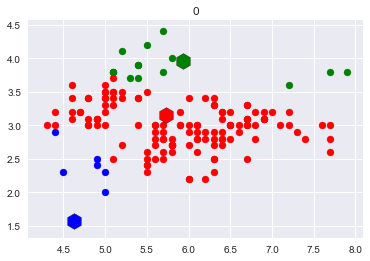

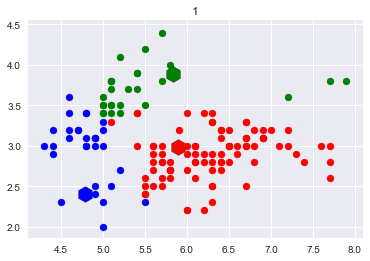

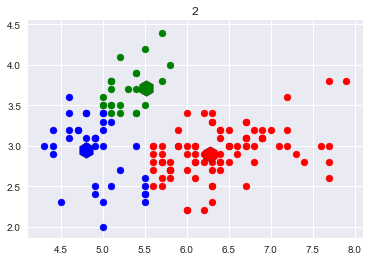

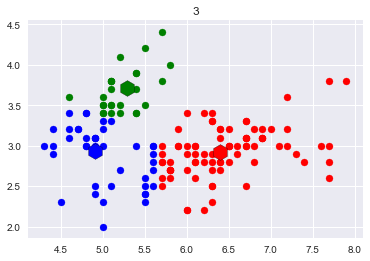

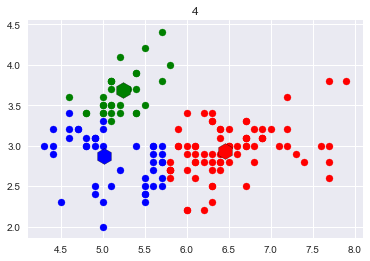

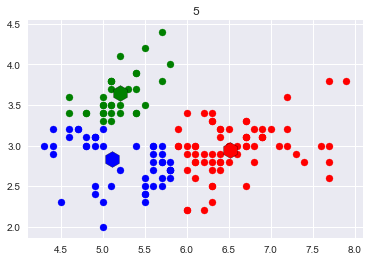

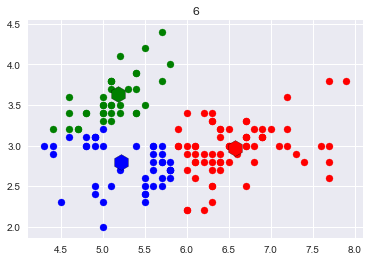

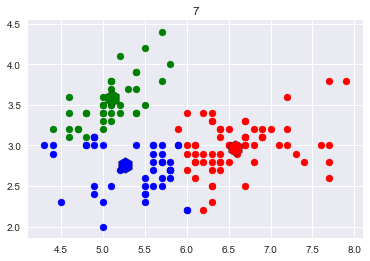

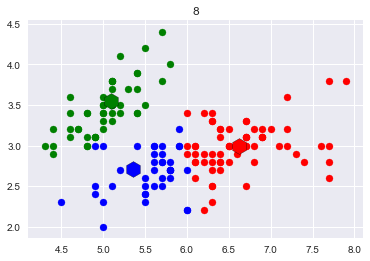

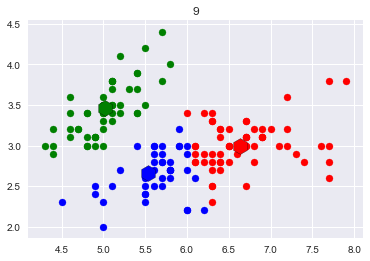

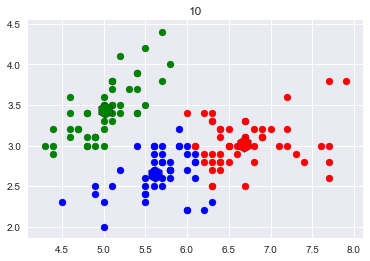

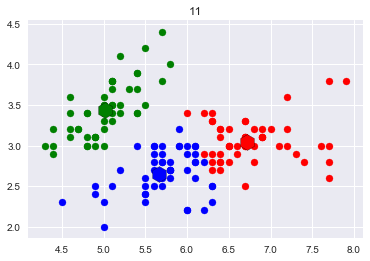

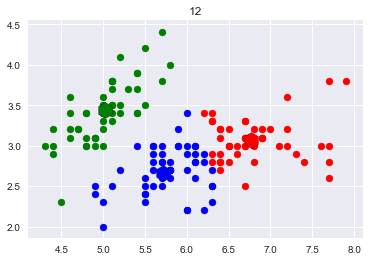

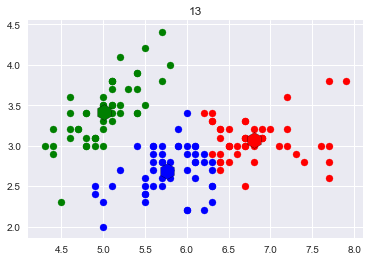

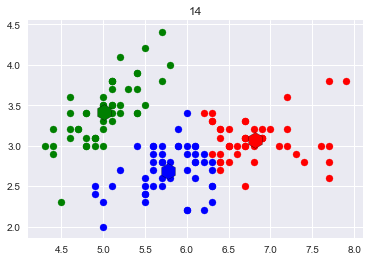

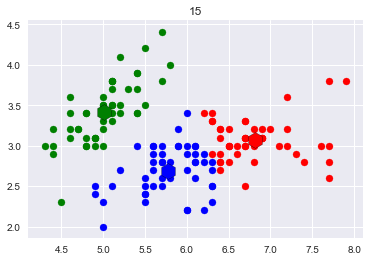

In [7]:
## by mean
run_example(use_means=True)

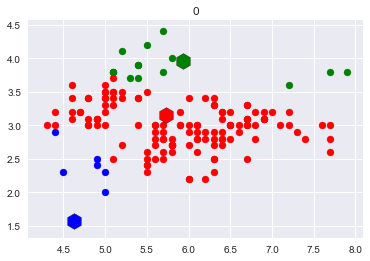

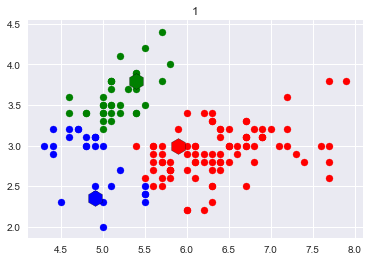

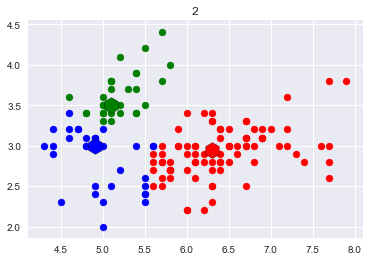

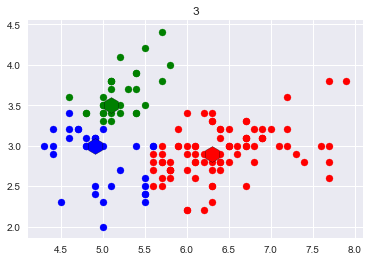

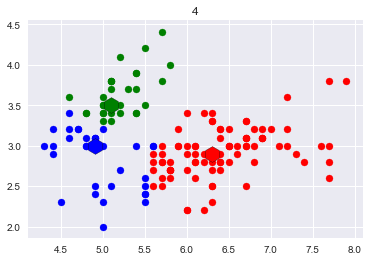

In [8]:
## by median
run_example(use_means=False)